NAME: Yashwantej Dyavari Shetty

#### Dataset

The dataset you'll used for this assignment is diabetes.csv

The target variable is Outcome. The other 8 variables are features.

This dataset was collected from pregnant women.  Each row corresponds to a person.  An Outcome of 0 means the person is not diagnosed with diabetes.  An Outcome of 1 means the person is diagnosed with diabetes.

In [3]:
import pandas

diabetes = pandas.read_csv('/Users/yashds/Downloads/Projects/AG6/diabetes.csv')


In [4]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
diabetes.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [8]:

from sklearn.preprocessing import MinMaxScaler
X = diabetes.drop(columns=['Outcome'])
y = diabetes["Outcome"]
Xscaled = MinMaxScaler().fit_transform(X)
df = pandas.DataFrame(Xscaled, columns=X.columns)
df.var().sort_values(ascending=False)



Pregnancies                 0.039287
Age                         0.038418
SkinThickness               0.025964
Glucose                     0.025814
BloodPressure               0.025171
DiabetesPedigreeFunction    0.020014
Insulin                     0.018556
BMI                         0.013806
dtype: float64

Outcome: Calculating the correlation between each of these features and the target variable will help us identify which feature the target variable depends on the least. The correlation coefficients between the columns can be determined using the corr method of a Pandas DataFrame in Python.

In [9]:


X = diabetes[['Pregnancies','BloodPressure','BMI','Age']]
y = diabetes["Outcome"]
Xscaled = MinMaxScaler().fit_transform(X)
df = pandas.DataFrame(Xscaled, columns=X.columns)
df.var().sort_values(ascending=False)

Pregnancies      0.039287
Age              0.038418
BloodPressure    0.025171
BMI              0.013806
dtype: float64

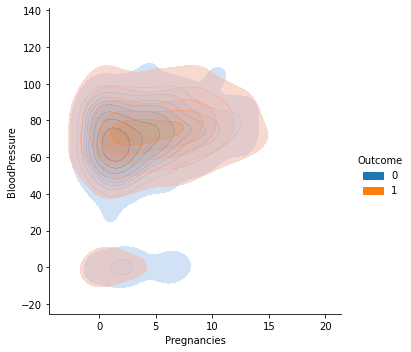

In [10]:
import seaborn
from matplotlib import pyplot
seaborn.displot(data=diabetes, x='Pregnancies', y='BloodPressure', hue='Outcome', kind='kde', fill=True, alpha=0.5)
pyplot.show()

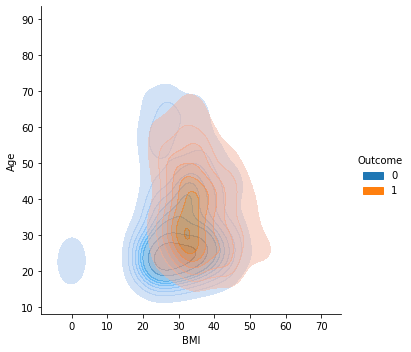

In [11]:
seaborn.displot(data=diabetes, x='BMI', y='Age', hue='Outcome', kind='kde', fill=True, alpha=0.5)
pyplot.show()

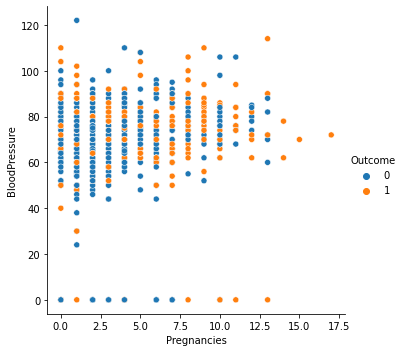

In [12]:
from sklearn.neighbors import KNeighborsClassifier


X = diabetes[['Pregnancies', 'BloodPressure']]
y = diabetes ['Outcome']

model1 = KNeighborsClassifier(n_neighbors=9)
model1.fit(X,y)

from matplotlib import pyplot
import seaborn
seaborn.relplot(data=diabetes, x ='Pregnancies', y='BloodPressure', hue='Outcome')
pyplot.show()

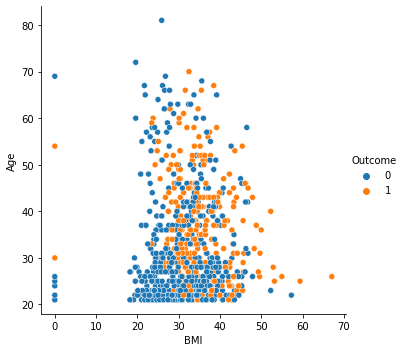

In [13]:
from sklearn.neighbors import KNeighborsClassifier


x = diabetes.drop(columns=['Outcome','Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction'])
y = diabetes ['Outcome']

model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(x,y)
from matplotlib import pyplot
import seaborn
seaborn.relplot(data=diabetes, x ='BMI', y='Age', hue='Outcome')
pyplot.show()



Using the data from the following rows as test data to compute the accuracy, precision and recall of the two models\
```
[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]
```



In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = diabetes[['Pregnancies', 'BloodPressure']]
y = diabetes['Outcome']
model8 = KNeighborsClassifier(n_neighbors=9)
model8.fit(X,y)
test_data1 = X.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116, 83, 241, 280, 290, 552]]
test_data2 = y.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116, 83, 241, 280, 290, 552]]
test = model8.predict(test_data1)

accuracy = accuracy_score(test_data2,test)
precision = precision_score(test_data2,test)
recall = recall_score(test_data2,test)

print("Model 1")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Model 1
Accuracy: 0.55
Precision: 0.0
Recall: 0.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier


X = diabetes[['Pregnancies', 'BloodPressure']]
y = diabetes['Outcome']
model1 = KNeighborsClassifier(n_neighbors=9)
model1.fit(X,y)

samples = diabetes.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]]
samples



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
356,1,125,50,40,167,33.3,0.962,28,1
244,2,146,76,35,194,38.2,0.329,29,0
218,5,85,74,22,0,29.0,1.224,32,1
346,1,139,46,19,83,28.7,0.654,22,0
291,0,107,62,30,74,36.6,0.757,25,1
302,5,77,82,41,42,35.8,0.156,35,0
137,0,93,60,25,92,28.7,0.532,22,0
634,10,92,62,0,0,25.9,0.167,31,0
710,3,158,64,13,387,31.2,0.295,24,0
395,2,127,58,24,275,27.7,1.600,25,0


In [17]:
result = pandas.DataFrame({
    'GroundTruth': samples['Outcome'], 
    'Prediction' : model1.predict( samples[ X.columns ]),
})

In [18]:
diabetes['Outcome'].value_counts(1).round(2)

0    0.65
1    0.35
Name: Outcome, dtype: float64

In [19]:
result[:]

,GroundTruth,Prediction
356,1,0
244,0,0
218,1,0
346,0,0
291,1,0
302,0,1
137,0,0
634,0,1
710,0,0
395,0,0


In [20]:
prediction_type = ['fn', 'tn', 'fn', 'tn', 'fn', 'fp', 'tn', 'fp', 'tn', 'tn', 'tn', 'tn', 'tn', 'fn', 'fn','tn','tn','fn','fp','tn']

In [21]:
result['type'] = prediction_type
result

,GroundTruth,Prediction,type
356,1,0,fn
244,0,0,tn
218,1,0,fn
346,0,0,tn
291,1,0,fn
302,0,1,fp
137,0,0,tn
634,0,1,fp
710,0,0,tn
395,0,0,tn


In [22]:
result['type'].value_counts()

tn    11
fn     6
fp     3
Name: type, dtype: int64

In [23]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier


x = diabetes[['BMI', 'Age']]
y = diabetes ['Outcome']

model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(x,y)

test_data3 = x.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116, 83, 241, 280, 290, 552]]
test_data4 = y.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116, 83, 241, 280, 290, 552]]
test2 = model2.predict(test_data3)

accuracy2 = accuracy_score(test_data4,test2)
precision2= precision_score(test_data4,test2)
recall2 = recall_score(test_data4,test2)

print("Model 2")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)

Model 2
Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 0.3333333333333333


In [24]:
from sklearn.neighbors import KNeighborsClassifier


x = diabetes[['BMI', 'Age']]
y = diabetes['Outcome']
model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(x,y)

samples = diabetes.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]]
samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
356,1,125,50,40,167,33.3,0.962,28,1
244,2,146,76,35,194,38.2,0.329,29,0
218,5,85,74,22,0,29.0,1.224,32,1
346,1,139,46,19,83,28.7,0.654,22,0
291,0,107,62,30,74,36.6,0.757,25,1
302,5,77,82,41,42,35.8,0.156,35,0
137,0,93,60,25,92,28.7,0.532,22,0
634,10,92,62,0,0,25.9,0.167,31,0
710,3,158,64,13,387,31.2,0.295,24,0
395,2,127,58,24,275,27.7,1.600,25,0


In [25]:
result = pandas.DataFrame({
    'GroundTruth': samples['Outcome'], 
    'Prediction' : model2.predict( samples[ x.columns ]),
})

In [26]:
diabetes['Outcome'].value_counts(1).round(2)

0    0.65
1    0.35
Name: Outcome, dtype: float64

In [28]:
result[:]

,GroundTruth,Prediction
356,1,0
244,0,0
218,1,0
346,0,0
291,1,0
302,0,1
137,0,0
634,0,0
710,0,0
395,0,0


In [29]:
prediction_type = ['fn', 'tn', 'fn', 'tn', 'fn', 'fp', 'tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'tn', 'tp', 'tp','tn','tn','fn','tn','tn']

In [30]:
result['type'] = prediction_type
result

,GroundTruth,Prediction,type
356,1,0,fn
244,0,0,tn
218,1,0,fn
346,0,0,tn
291,1,0,fn
302,0,1,fp
137,0,0,tn
634,0,0,tn
710,0,0,tn
395,0,0,tn


In [31]:
result['type'].value_counts()

tn    13
fn     4
tp     2
fp     1
Name: type, dtype: int64



Choosing the 4 most relevant features using f_classif, and build a KNN model with these 4 features.

Reporting the accuracy, precision, and recall of the model on the test data obtained from the same rows as shown.

In [32]:
from sklearn.feature_selection import SelectKBest,  f_classif

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
selector = SelectKBest(score_func=f_classif, k=4)
X_new = selector.fit_transform(X, y)
mask = selector.get_support(indices=True)
selected_features = X.columns[mask]
print('selected_features:',selected_features)

selected_features: Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


In [33]:

from sklearn.neighbors import KNeighborsClassifier

X = diabetes[selected_features]
y = diabetes['Outcome']
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X, y)

from sklearn.metrics import accuracy_score, precision_score, recall_score

X = X.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]]
y = y.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]]

model3 = model.predict(X)

accuracy = accuracy_score(y, model3)
precision = precision_score(y, model3)
recall = recall_score(y, model3)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 0.3333333333333333


In [34]:
y = diabetes['Outcome']
X = diabetes[selected_features]

samples = diabetes.iloc[[356, 244, 218, 346, 291, 302, 137, 634, 710, 395, 551, 526, 554, 748, 116,  83, 241, 280, 290, 552]]
samples

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
356,1,125,50,40,167,33.3,0.962,28,1
244,2,146,76,35,194,38.2,0.329,29,0
218,5,85,74,22,0,29.0,1.224,32,1
346,1,139,46,19,83,28.7,0.654,22,0
291,0,107,62,30,74,36.6,0.757,25,1
302,5,77,82,41,42,35.8,0.156,35,0
137,0,93,60,25,92,28.7,0.532,22,0
634,10,92,62,0,0,25.9,0.167,31,0
710,3,158,64,13,387,31.2,0.295,24,0
395,2,127,58,24,275,27.7,1.600,25,0


In [35]:
result = pandas.DataFrame({
    'GroundTruth': samples['Outcome'], 
    'Prediction' : model.predict( samples[ X.columns ]),
})


In [36]:
diabetes['Outcome'].value_counts(1).round(2)

0    0.65
1    0.35
Name: Outcome, dtype: float64

In [37]:
result[:]

,GroundTruth,Prediction
356,1,1
244,0,0
218,1,0
346,0,0
291,1,0
302,0,0
137,0,0
634,0,0
710,0,1
395,0,0


In [38]:
prediction_type = ['tp', 'tn', 'fn', 'tn', 'fn', 'tn', 'tn', 'tn', 'fp', 'tn', 'tn', 'tn', 'tn', 'tp', 'fn','tn','tn','fn','tn','tn']

In [39]:
result['type'] = prediction_type
result

,GroundTruth,Prediction,type
356,1,1,tp
244,0,0,tn
218,1,0,fn
346,0,0,tn
291,1,0,fn
302,0,0,tn
137,0,0,tn
634,0,0,tn
710,0,1,fp
395,0,0,tn


In [40]:
result['type'].value_counts()

tn    13
fn     4
tp     2
fp     1
Name: type, dtype: int64

Create a new column called "AgeGroup", which has the following values:

* Group1 - under 25 years old
* Group2 - from 25 to under 30 years old
* Group3 - from 30 to under 40 years old
* Group4 - from 40 to under 50 years old
* Group5 - from 50 years old and up

**Steps to carryout:**

+ The code defines a function called AgeGroup which takes an input parameter age. The function then uses a series of if-elif-else statements to determine which age group the input age falls into. 

+ The code then applies this AgeGroup function to the 'Age' column in the diabetes DataFrame using the apply() method. The resulting output is a new column called 'AgeGroup' in the diabetes DataFrame that contains the age group for each individual in the 'Age' column.


In [41]:
def AgeGroup(age):
    if age < 25:
        return "Group1"
      
    elif age < 30:
        return "Group2"
      
    elif age < 40:
        return "Group3"
   
    elif age < 50:
        return "Group4"
      
    else:
        return "Group5"
      
diabetes['AgeGroup'] = diabetes['Age'].apply(AgeGroup)

+ Report: The code is grouping the ages of individuals in the diabetes DataFrame into five categories.

**Steps to carryout:**

+ In the code we use the groupby method to group the data in the diabetes DataFrame by the 'AgeGroup' column, and then calculating the mean, median, and standard deviation of the 'BMI' column for each age group.

+ The resulting mean, median, and std variables for each age group.

+ Then we used the seaborn and matplotlib.pyplot libraries to create a scatter plot using the relplot function. The plot shows the relationship between age and BMI in the diabetes dataset, with each data point colored based on the individual's age group.

+ The resulting plot is displayed using the pyplot.show().

In [42]:
mean = diabetes.groupby('AgeGroup')['BMI'].mean()
median = diabetes.groupby('AgeGroup')['BMI'].median()
std = diabetes.groupby('AgeGroup')['BMI'].std()


print('mean:', mean)
print('median:', median)
print('std:', std)

mean: AgeGroup
Group1    30.011416
Group2    33.096610
Group3    32.472121
Group4    34.617797
Group5    30.302247
Name: BMI, dtype: float64
median: AgeGroup
Group1    29.80
Group2    33.20
Group3    32.00
Group4    33.95
Group5    30.30
Name: BMI, dtype: float64
std: AgeGroup
Group1    8.435030
Group2    8.714577
Group3    6.737134
Group4    5.981533
Group5    7.529683
Name: BMI, dtype: float64


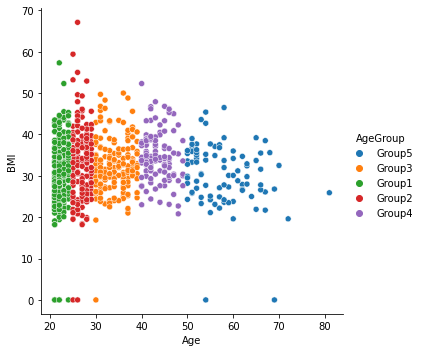

In [43]:
import seaborn
import matplotlib.pyplot as pyplot
seaborn.relplot(data=diabetes, x='Age', y='BMI', hue = 'AgeGroup')
pyplot.show()

+ Report: It shows numerical and visual relationship between age and BMI in the diabetes dataset by calculating  statistics for each age group and each data point colored based on the individual's age group. The plot can be used to identify any patterns, and to visually explore the relationship between age group and BMI.

Creating a new column for "BMILevel", which has values: UnderWeight, Healthy, Overweight, Obesity, Class3Obesity, based on the information from this website:

https://www.cdc.gov/obesity/basics/adult-defining.html

**Steps to carryout:**

+ It defines a function called BMILevel which takes an input parameter bmi. The function then uses a series of if-elif-else statements to determine which BMI level the input BMI falls into. The function returns the corresponding BMI level for the input BMI.

+ Then it applies this BMILevel function to the 'BMI' column in the diabetes DataFrame using the apply() method. The resulting output is a new column called 'BMILevel' in the diabetes DataFrame that contains the BMI level for each individual in the 'BMI' column.


In [44]:
def BMILevel(bmi):
    if bmi < 18.5:
        return "UnderWeight"
    elif bmi < 25:
        return "Healthy"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 40:
        return "Obesity"
    else:
        return "Class3Obesity"

diabetes['BMILevel'] = diabetes['BMI'].apply(BMILevel)

+ Report: The code is grouping the BMI of individuals in the diabetes DataFrame into five categories


**Steps to carryout:**

+ In the code we used groupby method to group the data in the diabetes DataFrame by both the 'AgeGroup' and 'BMILevel' columns, and then calculating the mean, median, and standard deviation of the 'Glucose' column for each combination of age group and BMI level.

+ Resulting mean, median, and std variables for each combination of age group and BMI level.

+ We used the matplotlib and seaborn libraries to create a scatter plot using the relplot function. The plot shows the relationship between age group and glucose level in the diabetes dataset, with each data point colored based on the individual's BMI level.

+ Resulting plot is displayed using the pyplot.show().

In [45]:
mean = diabetes.groupby(['AgeGroup', 'BMILevel'])['Glucose'].mean()
median = diabetes.groupby(['AgeGroup', 'BMILevel'])['Glucose'].median()
std = diabetes.groupby(['AgeGroup', 'BMILevel'])['Glucose'].std()


print('mean:', mean)
print('median:', median)
print('std:', std)

mean: AgeGroup  BMILevel     
Group1    Class3Obesity    132.153846
          Healthy          103.975610
          Obesity          112.390244
          Overweight       106.548387
          UnderWeight       94.625000
Group2    Class3Obesity    140.758621
          Healthy           96.318182
          Obesity          117.079545
          Overweight       113.705882
          UnderWeight       98.750000
Group3    Class3Obesity    119.380952
          Healthy          113.941176
          Obesity          132.694118
          Overweight       118.000000
          UnderWeight      115.000000
Group4    Class3Obesity    136.500000
          Healthy          109.500000
          Obesity          123.723684
          Overweight       121.722222
Group5    Class3Obesity    160.000000
          Healthy          127.375000
          Obesity          143.162791
          Overweight       138.541667
          UnderWeight      130.500000
Name: Glucose, dtype: float64
median: AgeGroup  BMILevel  

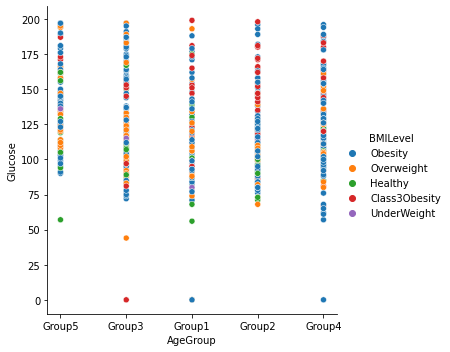

In [46]:
from matplotlib import pyplot
import seaborn
seaborn.relplot(data=diabetes, x='AgeGroup', y='Glucose', hue='BMILevel')
pyplot.show()

+ Report: It shows numerical and visual relationship between age group and glucose level in the diabetes dataset with each data point colored based on the individual's BMI level. The plot can be used to identify any patterns, and to visually explore the relationship between age group, BMI level, and glucose level in individuals with diabetes.


Creating a set of features that will be used for modeling.  These features are:
* Blood pressure
* Insulin
* Age group
* BMI level

Using standard scaling to rescale blood pressure and insulin.

Using the categorical features age group and BMI level into numerical features.

**Steps to carryout:**

+ The code performs the following steps:

+ Importing the pandas library as pd and the StandardScaler class from the sklearn.preprocessing module.

+ Selecting specific columns ('BloodPressure', 'Insulin', 'AgeGroup', 'BMILevel') from the 'diabetes' dataframe and create a copy of it as X.

+ Converting the categorical variables 'AgeGroup' and 'BMILevel' in X to numerical using one-hot encoding, by using the get_dummies() function. This creates new columns for each unique value in these categorical columns.

+ Creating an instance of the StandardScaler class and apply it to the 'BloodPressure' and 'Insulin' columns of X to normalize their values.

+ Then replacing the original 'BloodPressure' and 'Insulin' columns in X with the normalized values.


In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = diabetes[['BloodPressure', 'Insulin', 'AgeGroup', 'BMILevel']].copy()
X = pandas.get_dummies(X, columns=['AgeGroup','BMILevel'])
scaled_data = scaler.fit_transform(X[['BloodPressure', 'Insulin']])
X['BloodPressure'] = scaled_data[ : , 0]
X['Insulin'] = scaled_data[ : , 1]
X

,BloodPressure,Insulin,AgeGroup_Group1,AgeGroup_Group2,AgeGroup_Group3,AgeGroup_Group4,AgeGroup_Group5,BMILevel_Class3Obesity,BMILevel_Healthy,BMILevel_Obesity,BMILevel_Overweight,BMILevel_UnderWeight
0,0.149641,-0.692891,0,0,0,0,1,0,0,1,0,0
1,-0.160546,-0.692891,0,0,1,0,0,0,0,0,1,0
2,-0.263941,-0.692891,0,0,1,0,0,0,1,0,0,0
3,-0.160546,0.123302,1,0,0,0,0,0,0,0,1,0
4,-1.504687,0.765836,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.356432,0.870031,0,0,0,0,1,0,0,1,0,0
764,0.046245,-0.692891,0,1,0,0,0,0,0,1,0,0
765,0.149641,0.279594,0,0,1,0,0,0,0,0,1,0
766,-0.470732,-0.692891,0,0,0,1,0,0,0,1,0,0


In [52]:
X.describe()

,BloodPressure,Insulin,AgeGroup_Group1,AgeGroup_Group2,AgeGroup_Group3,AgeGroup_Group4,AgeGroup_Group5,BMILevel_Class3Obesity,BMILevel_Healthy,BMILevel_Obesity,BMILevel_Overweight,BMILevel_UnderWeight
count,7.680000e+02,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-1.327244e-17,-3.556183e-17,0.285156,0.230469,0.214844,0.153646,0.115885,0.127604,0.132812,0.486979,0.233073,0.019531
std,1.000652e+00,1.000652e+00,0.451783,0.421407,0.410982,0.360844,0.320296,0.333866,0.339593,0.500156,0.423064,0.138473
min,-3.572597e+00,-6.928906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.673367e-01,-6.928906e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.496408e-01,-4.280622e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.632228e-01,4.120079e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.734528e+00,6.652839e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


+ Report: This code performs feature selection, data normalization, and categorical encoding, which are important steps in data preprocessing for machine learning algorithms.

Suppose that we want to compare these two methods of cross validation: shuffle and split, and 12-fold cross validation.

With shuffle and split, you will probably want to specify the same number test data points and training data points as 12-fold cross validation.


+ The code uses ShuffleSplit cross-validation with 12 splits on the diabetes dataset. The diabetes dataset is split into train and test sets in each fold of cross-validation using the ss.split method.

+ The n_test_folds variable is calculated as the number of data points in each test fold, which is equal to the total number of data points divided by the number of folds.

+ In each iteration of the loop, the indices of the data points in the train and test sets are stored in the train_index and test_index variables, respectively. The number of data points in the train and test sets is calculated using the n_train and n_test variables, respectively.


In [53]:

from sklearn.model_selection import KFold, ShuffleSplit
N = len(diabetes)

kf = KFold(n_splits=12)
n_folds = 12  
n_test_folds = N/n_folds
ss = ShuffleSplit(n_splits=12, test_size=n_test_folds/N)
for train_index, test_index in ss.split(diabetes):
    n_test = len(test_index)
    print(f"Number of test data points in this fold of shuffle and split CV: {n_test}")
    n_train = N - n_test
    print(f"Number of train data points in this fold of shuffle and split CV: {n_train}")


Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this fold of shuffle and split CV: 64
Number of train data points in this fold of shuffle and split CV: 704
Number of test data points in this

+ Report: The output will be the loop display the number of data points in each train and test set for each fold of cross-validation.

***Steps to carryout:***

+ The code implementing a function called five_five_fold_cross_validate which performs 5-fold cross-validation with shuffling on a given model, X, and y. 

Here are the steps:

+ The function takes model, X, and y as inputs.
+ A list called scores is initialized to store the f1 macro scores obtained from each fold.
+ The for loop iterates 5 times and initializes a new KFold cross-validator with 5 splits and shuffling set to True.
+ The cross_validate function is called to evaluate the model using the KFold cross-validator, X, and y, with scoring='f1_macro' to       evaluate the model's performance. The results of the cross-validation are stored in the results dictionary.
+ The f1 macro scores obtained from the cross-validation are appended to the scores list using the extend() method.
+ The mean of the f1 macro scores is calculated using the np.mean() function and stored in a variable called scores_mean.


In [56]:


import pandas

diabetes = pandas.read_csv('/Users/yashds/Downloads/Projects/AG6/diabetes.csv')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate
import numpy as np
model=KNeighborsClassifier()

from sklearn.metrics import f1_score
X = diabetes.drop('Outcome', axis= 1)
y = diabetes['Outcome']
scores=[]
def five_five_fold_cross_validate(model, X, y):
    for i in range(5):
        kf = KFold(n_splits=5, shuffle=True)
        results = cross_validate(model, X, y, cv=kf, scoring='f1_macro')
        scores.append(results['test_score'].tolist())
        scores_mean = np.mean(scores)
        return scores_mean

    
five_five_fold_cross_validate(model, X, y)


0.6742478245317113

+ Report: the output is scores_mean which is average f1 score of the cross validation

To Validate a 10-nearest neighbor model on the diabetes dataset using the five_five_fold_cross_validate method above.

Use "Outcome" for y, and any two features for X.  Trying to get as high scores as you can by choose two good features. 


***Steps to Carryout:***

+ Import KNeighborsClassifier and KFold modules from sklearn
+ Create a KNeighborsClassifier model with n_neighbors = 10
+ Create a variable X1, which contains the 'Glucose' and 'BMI' columns of the diabetes dataset
+ Create a variable y, which contains the 'Outcome' column of the diabetes dataset
+ Call the five_five_fold_cross_validate function with model1, X1, and y as arguments and store the output in a variable called result1
+ Repeat steps 3-5 for X2 = ['Pregnancies', 'BMI'], X3 = ['Pregnancies', 'Glucose'], X4 = ['Insulin', 'SkinThickness'] and X5 = ['Insulin', 'SkinThickness']

In [58]:
model1 = KNeighborsClassifier(n_neighbors=10)
X1 = diabetes[['Glucose','BMI']] 
y = diabetes['Outcome']
five_five_fold_cross_validate(model1,X1,y)

0.6876746134642723

In [60]:
model2 = KNeighborsClassifier(n_neighbors=10)
X2 = diabetes[['Pregnancies','BMI']] 
y = diabetes['Outcome']
five_five_fold_cross_validate(model2,X2,y)

0.6577492610967869

In [61]:
model3 = KNeighborsClassifier(n_neighbors=10)
X3 = diabetes[['Pregnancies','Glucose']] 
y = diabetes['Outcome']
five_five_fold_cross_validate(model3,X3,y)

0.6555341123798364

In [62]:
model4 = KNeighborsClassifier(n_neighbors=10)
X4 = diabetes[['Pregnancies','BMI']] 
y = diabetes['Outcome']
five_five_fold_cross_validate(model4,X4,y)

0.6434768138819735

In [63]:
model5 = KNeighborsClassifier(n_neighbors=10)
X5 = diabetes[['Insulin','SkinThickness']] 
y = diabetes['Outcome']
five_five_fold_cross_validate(model5,X5,y)

0.6234613305970189

+ Report: Model 1 giving the high scores when compared to all other models

Validate a 10-nearest neighbor model on the diabetes dataset using the five_five_fold_cross_validate method above.

Use "Outcome" for y.

For X, choose the first two principal components obtained by PCA.  To train PCA, use all features of diabetes.

***Steps to Carryot:***
+ In this code, PCA (Principal Component Analysis) is used to reduce the dimensionality of the dataset to 2. The diabetes dataset is loaded and the target variable 'Outcome' is removed from the dataset to obtain the feature matrix X and the target vector y.
+ Then, PCA is applied to X with n_components=2, which means that the resulting dataset will have two dimensions.

+ After applying PCA, the KFold method from scikit-learn is used to generate 12 folds of the dataset for cross-validation. The cross_validate function from scikit-learn is used to perform cross-validation on the model using the reduced dataset X_pca and the target vector y.

In [64]:
from sklearn.decomposition import PCA
X = diabetes.drop('Outcome', axis= 1)
y = diabetes['Outcome']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

scores = cross_validate(model, X_pca, y, cv=kf, scoring = ['accuracy'])
scores['test_accuracy'].mean()

0.7174479166666666

+ The scoring parameter is set to 'accuracy' which means that the accuracy score will be calculated for each fold.

In [65]:
pca.explained_variance_ratio_.round(3)

array([0.889, 0.062])

In [66]:
diabetes[['pca1','pca2']] = X_pca

In [67]:
diabetes.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pca1,pca2
329,6,105,70,32,68,30.8,0.122,37,0,-12.596631,14.353222
532,1,86,66,52,65,41.3,0.917,29,0,-16.097455,35.006923
483,0,84,82,31,125,38.2,0.233,23,0,42.254780,40.153138


In [68]:
df = pandas.DataFrame(pca.components_.T, 
                      index=X.columns, 
                      columns=['pca1','pca2'])
df.round(2)

,pca1,pca2
Pregnancies,-0.00,-0.02
Glucose,0.10,-0.97
BloodPressure,0.02,-0.14
SkinThickness,0.06,0.06
Insulin,0.99,0.09
BMI,0.01,-0.05
DiabetesPedigreeFunction,0.00,-0.00
Age,-0.00,-0.14


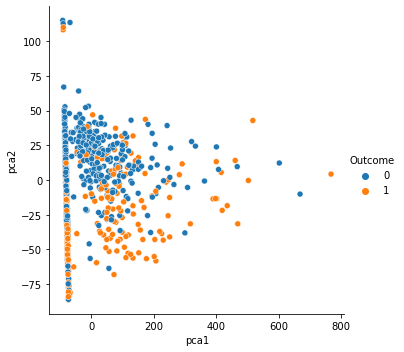

In [76]:
import seaborn
from matplotlib import pyplot
seaborn.relplot(data=diabetes, x='pca1', y='pca2', hue='Outcome')
pyplot.show()

To Validate a most-frequent dummy classifier on the diabetes dataset using the five_five_fold_cross_validate method above.

Use "Outcome" for y.

For X, choose the first two principal components obtained by PCA.  To train PCA, use all features of diabetes.

***Steps to Carryout:***

+ The code imports the DummyClassifier and PCA classes from scikit-learn, and loads the diabetes dataset into the variables X and y.
+ A PCA object is created with n_components=2, indicating that the data should be reduced to 2 dimensions.
+ The fit_transform() method of the PCA object is called on the X dataset, creating a transformed dataset X_pca with 2 dimensions.
+ A DummyClassifier object is created with the strategy parameter set to 'most_frequent', indicating that the classifier should predict the most frequent class in the training data.
+ The cross_validate() function from scikit-learn is called with the dummy classifier, X_pca data and y labels and 12-fold cross-validation object kf. The resulting dictionary object result is stored.
+ The five_five_fold_cross_validate() function is called with the dummy classifier, X_pca data and y labels. This function performs 5x5-fold cross-validation and returns the mean F1 score.
+ The steps above are used to evaluate the performance of the DummyClassifier using PCA transformed data with 2 dimensions, and cross-validate with 12 folds.

In [77]:
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
import numpy as np

X = diabetes.drop('Outcome', axis= 1)
y = diabetes['Outcome']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
dummy = DummyClassifier(strategy='most_frequent')
five_five_fold_cross_validate(dummy, X_pca, y)

0.3935686328517544

Some of the features have missing values.  Unfortunately, in this dataset, missing values are not indicated as "nan".  Therefore, if you use pandas' "dropna", it won't work.

However, if we understand the meanings of the features, you can guess which ones have missing values.  For example, blood pressure should not be less than 20.

To Find the features that you think have missing values in the dataset.

In [78]:
for column in diabetes.columns:
    unique_values = diabetes[column].unique()
    print(column, unique_values)

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

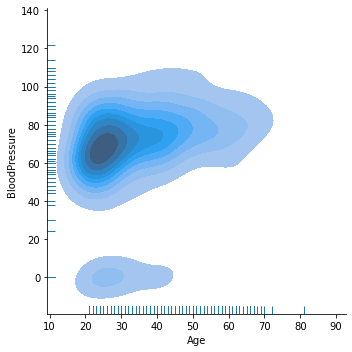

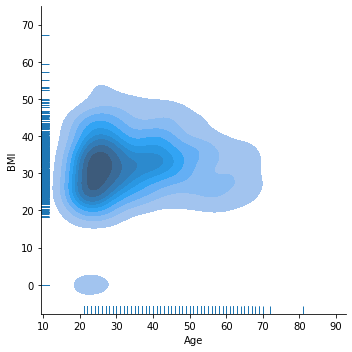

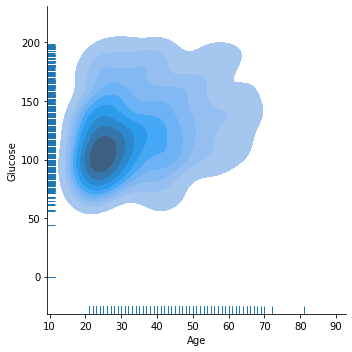

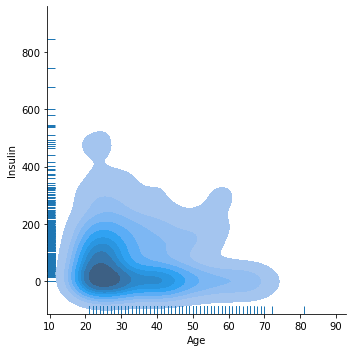

In [80]:
import seaborn
fig = seaborn.displot(data=diabetes, x='Age', y='BloodPressure', kind='kde', fill=True, rug=True)
fig = seaborn.displot(data=diabetes, x='Age', y='BMI', kind='kde',fill=True, rug=True)
fig = seaborn.displot(data=diabetes, x='Age', y='Glucose', kind='kde',fill=True, rug=True)
fig = seaborn.displot(data=diabetes, x='Age', y='Insulin', kind='kde',fill=True, rug=True)

To remove the missing values from the diabetes dataset.

We need to find 3 decision models with the best F1 scores, based on these characteristics:
* The first model: find the best max_depth.
* The second model: find the best min_samples_leaf
* The third model: find the best combination of max_depth and min_samples_leaf

and evaluate models using f1_score and ShuffleSplit with 100 splits.

You can read about these two parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [82]:
import numpy as np
diabetes = diabetes.replace({'Glucose': {0: np.nan},
                 'BloodPressure': {0: np.nan},
                 'SkinThickness': {0: np.nan},
                 'DiabetesPedigreeFunction' : {0:np.nan},
                 'Pregnancies' : {0:np.nan},           
                 'Insulin': {0: np.nan},
                 'BMI': {0: np.nan}})


diabetes = diabetes.dropna()


diabetes = diabetes.reset_index(drop=True)

diabetes.to_csv('diabetes_cleaned.csv', index=False)

In [83]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
import numpy as np


validator = ShuffleSplit(n_splits=100)
max_depth_range = range(1, X.shape[1]+1)
best_f1_score = 0
best_max_depth = None



for max_depth in max_depth_range:
    f1_scores = []
    for train_index, test_index in validator.split(X):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        
        diabetes = DecisionTreeClassifier(max_depth=max_depth)
        diabetes.fit(X_train, y_train)
        
        
        y_pred = diabetes.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
    
    
    mean_f1_score = np.mean(f1_scores)
    
    
    if mean_f1_score > best_f1_score:
        best_f1_score = mean_f1_score
        best_max_depth = max_depth


print('Best max_depth:', best_max_depth)
print('Best F1 score:', best_f1_score)

Best max_depth: 4
Best F1 score: 0.6272503355035418


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
import numpy as np
min_samples_leaf_range = range(1, X.shape[1]+1)
best_min_samples_leaf = None
best_f1_score = 0


cv = ShuffleSplit(n_splits=10)


for min_samples_leaf in min_samples_leaf_range:
    
    
    clf = DecisionTreeClassifier(max_depth=3)
    
    
    f1_scores = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))
    avg_f1_score = np.mean(f1_scores)
    
   
    if avg_f1_score > best_f1_score:
        best_min_samples_leaf = min_samples_leaf
        best_f1_score = avg_f1_score
        
print("Best value for min_samples_leaf:", best_min_samples_leaf)
print("Corresponding F1 score:", best_f1_score)

Best value for min_samples_leaf: 3
Corresponding F1 score: 0.6684133059922533


In [86]:
from sklearn.model_selection import cross_val_score
best_score = 0
best_params = {}

# Iterate over different combinations of max_depth and min_samples_leaf
for max_depth in max_depth_range:
    for min_samples_leaf in min_samples_leaf_range:
        # Create a DecisionTreeClassifier with current hyperparameters
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

        # Evaluate model using cross-validation
        cv_scores = cross_val_score(clf, X, y, cv=10)
        avg_score = cv_scores.mean()

        # If current hyperparameters give a better F1 score, update best_score and best_params
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}

# Create a final DecisionTreeClassifier using best hyperparameters and train it on the entire dataset
clf = DecisionTreeClassifier(**best_params)
clf.fit(X, y)

# Evaluate the final model using F1 score
y_pred = clf.predict(X)
f1 = f1_score(y, y_pred)
print(f1)

0.8536585365853658


Comparing the performance of the best decision tree classifier and a random forest (with similar max_depth and min_samples_leaf).


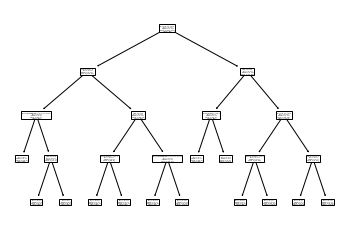

In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)
model.fit(X,y)
t = plot_tree(model, 
              feature_names=X.columns, 
              class_names=['BMI','Insulin','SkinThickness','BloodPressure','Glucose','Pregnancies','DiabetesPedigreeFunction','Age'])

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate, ShuffleSplit
from matplotlib import pyplot 
cv = ShuffleSplit(n_splits=100)
result = cross_validate(model, X, y, cv=cv, scoring=['f1','precision','recall'])
print(result['test_f1'].mean().round(2))
print(result['test_precision'].mean().round(2))
print(result['test_recall'].mean().round(2))

0.58
0.62
0.57


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.dummy import DummyClassifier
cv = ShuffleSplit(n_splits=100)
def evaluate(model, X, y, cv):
    result = cross_validate(model, X, y, cv=cv, scoring='f1')
    return result['test_score'].mean().round(2)

In [90]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=50)
baseline = DummyClassifier(strategy='stratified')

In [94]:
evaluate(baseline, X, y, cv)



0.33

In [95]:
evaluate(rf_model, X, y, cv)

0.61

In [96]:
evaluate(dt_model, X, y, cv)

0.56

By default, a random forest classifier uses 100 random trees (n_estimators). The larger the number of random trees, the longer it takes to train and predict.

We need to find what is the smallest number random trees in a random forest do we need for a random forest classifer to outperform your best decision tree classifier


In [97]:
rf_model = RandomForestClassifier(n_estimators=3,
                                  max_depth=4, 
                                  min_samples_leaf=6)
evaluate(rf_model, X, y, cv)

0.61

Comparing the performance of the best decision tree classifier and logistic regression classifier.

If our logistic regression classifer doesn't convert, we can increase max_iter.


In [98]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, cross_validate
model1 = RandomForestClassifier(n_estimators=20)
model2 = LinearSVC(max_iter=10000)
model3 = DecisionTreeClassifier()
model4 = LogisticRegression()

cv = ShuffleSplit(n_splits=30)
r1 = cross_validate(model1, X, y, scoring='f1', cv=cv)
r2 = cross_validate(model2, X, y, scoring='f1', cv=cv)
r3 = cross_validate(model3, X, y, scoring='f1', cv=cv)
r4 = cross_validate(model4, X, y, scoring='f1', cv=cv)

print(r1['test_score'].mean())
print(r2['test_score'].mean())
print(r3['test_score'].mean())
print(r4['test_score'].mean())


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

0.6085752840985883
0.5175340886207319
0.5548421466094998
0.6259998616155119


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_